In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df_cluster=pd.read_csv('df_cluster.csv')
df_cluster.head()

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,Churn_probability,transaction/day,CLV,recency
0,0.148148,0,XW0DQ7H,2017-08-17,0,xxxxxxxx,2025-08-19 16:08:02,0.991220,0.514859,0.526717,...,0,1,0,0,0,0,0.003610,0.850001,10.591081,0.975000
1,0.407407,0,5K0N3X1,2017-08-28,0,CID21329,2025-08-19 12:38:13,0.990244,0.515803,0.121456,...,0,0,1,0,0,0,0.003547,0.217005,8.883273,0.987342
2,0.629630,0,1F2TCL3,2016-11-11,1,CID12313,2025-08-19 22:53:21,0.988293,0.550486,0.204074,...,1,0,0,0,0,0,0.964750,0.308034,0.000148,0.829787
3,0.500000,1,VJGJ33N,2016-10-29,1,CID3793,2025-08-19 15:57:50,0.985366,0.473971,0.246577,...,1,0,0,0,0,0,0.970951,0.469295,0.000066,0.795918
4,0.388889,0,SVZXCWB,2017-09-12,0,xxxxxxxx,2025-08-19 15:46:44,0.994146,0.483866,0.238950,...,1,0,0,0,0,0,0.959872,0.391017,0.000203,0.975000


# KMeans

In [51]:
from sklearn.cluster import KMeans
x_cluster=df_cluster[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']]

In [52]:
from sklearn.metrics import silhouette_score
wcss=[]
silhoutte_scores=[]

for k in range(2,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_cluster)
    wcss.append(kmeans.inertia_)
    silhoutte_scores.append(silhouette_score(x_cluster,kmeans.labels_))

Text(0, 0.5, 'WCSS')

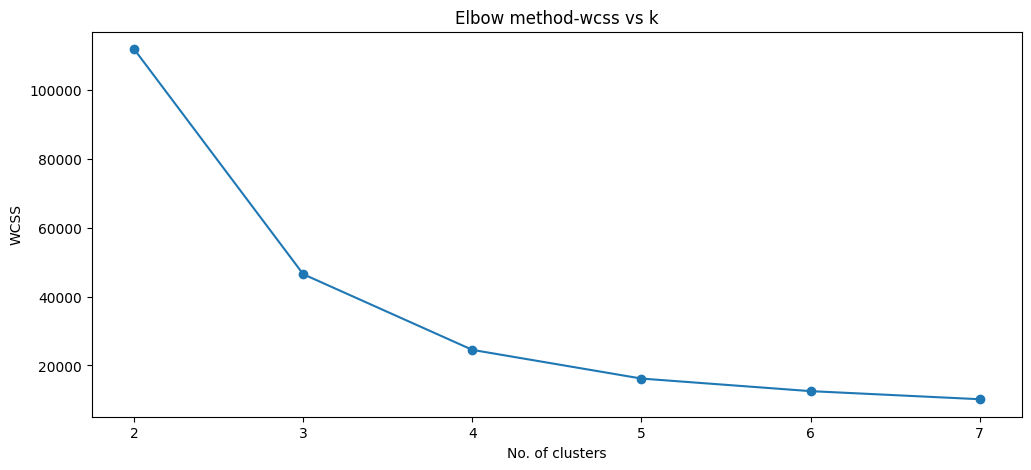

In [53]:
plt.figure(figsize=(12,5))
plt.plot(range(2,8),wcss,marker='o')
plt.title("Elbow method-wcss vs k")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

Text(0, 0.5, 'Silhouette Score')

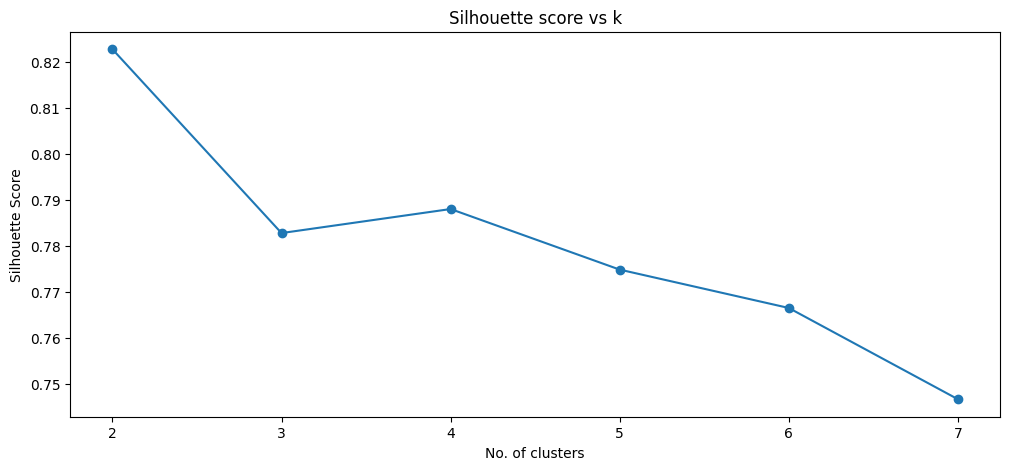

In [54]:
plt.figure(figsize=(12,5))
plt.plot(range(2,8),silhoutte_scores,marker='o')
plt.title("Silhouette score vs k")
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")

#### Though optimal no. of clusters comea out to be 4, but after the proper knowledge of the dataset, the customers will be divided into 3 categories on the basis of their CLV(Customer Lifetime Value) and Churn Probability

In [55]:
kmeans=KMeans(n_clusters=3,random_state=42)
df_cluster['cluster']=kmeans.fit_predict(x_cluster)

In [56]:
cluster_summary=df_cluster.groupby('cluster')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
cluster_summary

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
cluster,,,,
0,0.045048,0.870871,0.248333,0.038285
1,11.002008,0.004011,0.365068,0.456485
2,6.576290,0.011231,0.333722,0.268182


Text(0.5, 1.0, 'Customer Segmentation by KMeans')

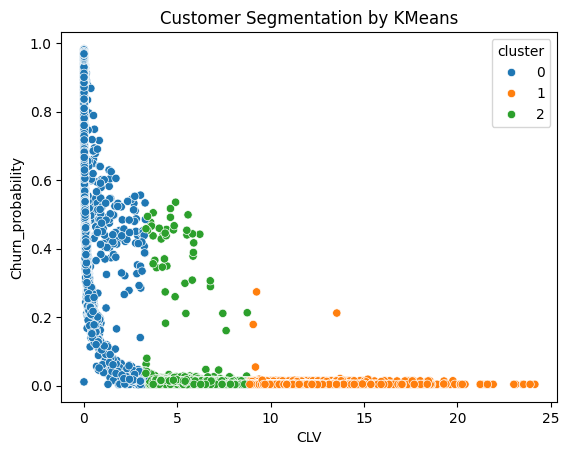

In [57]:
import seaborn as sns
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['cluster'],palette='tab10')
plt.title("Customer Segmentation by KMeans")

# Gaussian Mixture Model

In [58]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,random_state=42)
df_cluster['cluster_gmm']=gmm.fit_predict(x_cluster)

In [59]:
gmm_cluster=df_cluster.groupby('cluster_gmm')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
gmm_cluster

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
cluster_gmm,,,,
0,0.000250,0.964859,0.247583,0.022415
1,9.865060,0.003646,0.384394,0.458016
2,2.588271,0.331397,0.249568,0.094444


Text(0.5, 1.0, 'Customer Segmentation by GMM')

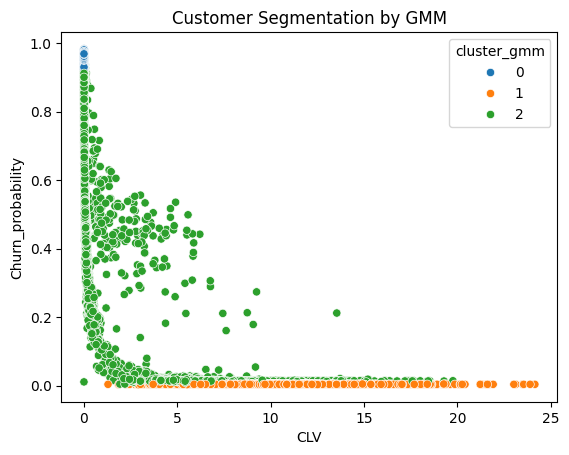

In [60]:
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['cluster_gmm'],palette='tab10')
plt.title("Customer Segmentation by GMM")

### Thus, KMeans performs better than Gaussian Mixture Model

In [61]:
final_cluster=KMeans(n_clusters=3,random_state=42)
df_cluster['final_segmentation']=final_cluster.fit_predict(x_cluster)

In [63]:
cluster_summary_final=df_cluster.groupby('final_segmentation')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
cluster_summary_final

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
final_segmentation,,,,
0,0.045048,0.870871,0.248333,0.038285
1,11.002008,0.004011,0.365068,0.456485
2,6.576290,0.011231,0.333722,0.268182


Text(0.5, 1.0, 'Final Segmentation of Customers')

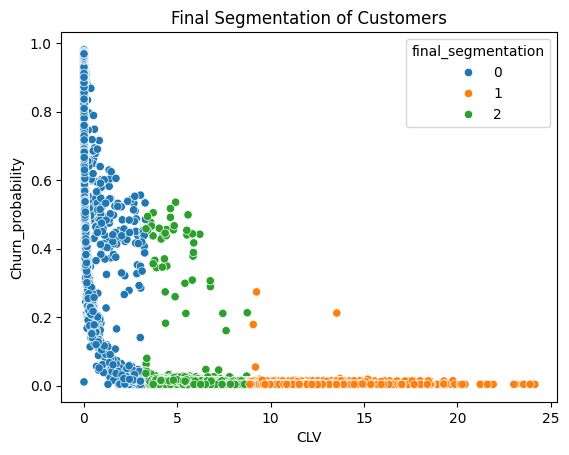

In [64]:
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['final_segmentation'],palette='tab10')
plt.title("Final Segmentation of Customers")